In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

In [2]:
def rk4n(F, V, U, h, m):
    nF = len(F)
    nV = len(V)
    K1 = np.zeros([nF],dtype=sy.Symbol)
    K2 = np.zeros([nF],dtype=sy.Symbol)
    K3 = np.zeros([nF],dtype=sy.Symbol)
    K4 = np.zeros([nF],dtype=sy.Symbol)
    res = np.zeros([m,nV],dtype=float)
    T = list(np.copy(U))

    for p in range(m):
        for i in range(nF):
            K1[i] = F[i]
            K2[i] = F[i]
            K3[i] = F[i]
            K4[i] = F[i]
        for i in range(nF):
            for j in range(nV):
                K1[i] = K1[i].subs(V[j],float(T[j]))
            K1[i] = h*K1[i]
        for i in range(nF):
            K2[i] = K2[i].subs(V[0],float(T[0])+h/2)
            for j in range(1,nV):
                K2[i] = K2[i].subs(V[j],float(T[j])+K1[j-1]/2)
            K2[i] = h*K2[i]
        for i in range(nF):
            K3[i] = K3[i].subs(V[0],float(T[0])+h/2)
            for j in range(1,nV):
                K3[i] = K3[i].subs(V[j],float(T[j])+K2[j-1]/2)
            K3[i] = h*K3[i]
        for i in range(nF):
            K4[i] = K4[i].subs(V[0],float(T[0])+h)
            for j in range(1,nV):
                K4[i] = K4[i].subs(V[j],float(T[j])+K3[j-1])
            K4[i] = h*K4[i]
        T[0] = T[0]+h
        res[p,0] = T[0]
        for i in range(nF):
            T[i+1] = T[i+1] + (K1[i]+2*K2[i]+2*K3[i]+K4[i])/6
            res[p,i+1] = T[i+1]
    return res

In [3]:
x,y,z = sy.symbols('x,y,z') 

# Ecuaciones
f = 0.4*x -0.018*x*y
g = -0.8*y + 0.023*x*y

# Parámetros del algoritmo
h = 1
n = 20

# PROCEDIMIENTO
resultados = rk4n([f,g],[x,y,z],[0,30,4],h,n)
ti = resultados[:,0]

xi = resultados[:,1]

yi = resultados[:,2]
for i in range(len(ti)):
    ti[i]+=1900
    

# Datos reales dados
conejos = [30., 47.2, 70.2, 77.4, 36.3, 20.6, 18.1, 21.4, 22., 25.4, 27.1, 40.3, 57., 76.6, 52.3, 19.5, 11.2, 7.6, 14.6, 16.2, 24.7]
linces = [4., 6.1, 9.8, 35.2, 59.4, 41.7, 19., 13., 8.3, 9.1, 7.4, 8., 12.3, 19.5, 45.7, 51.1, 29.7, 15.8, 9.7, 10.1, 8.6]
maximoC = -1
maximoL = -1
promedioC = 0
promedioL = 0
diaC = 0
diaL = 0

# Errores

In [4]:
print("ERRORES LOCALES")
for i in range(len(conejos)-1):
    errLocalC = round(abs(conejos[i]-xi[i]),1)
    errLocalL = round(abs(linces[i]-yi[i]),1)
    promedioC += errLocalC
    promedioL += errLocalL
    print("Año: {} Error Conejos: {}, Error linces: {}".format(ti[i], errLocalC, errLocalL))
    if errLocalC>maximoC:
        maximoC=errLocalC
        diaC = ti[i]
    if errLocalL>maximoL:
        maximoL=errLocalL
        diaL = ti[i]

ERRORES LOCALES
Año: 1901.0 Error Conejos: 0.1, Error linces: 23.6
Año: 1902.0 Error Conejos: 17.5, Error linces: 48.6
Año: 1903.0 Error Conejos: 40.8, Error linces: 74.2
Año: 1904.0 Error Conejos: 48.4, Error linces: 120.6
Año: 1905.0 Error Conejos: 7.9, Error linces: 164.8
Año: 1906.0 Error Conejos: 7.2, Error linces: 166.1
Año: 1907.0 Error Conejos: 9.1, Error linces: 161.3
Año: 1908.0 Error Conejos: 5.2, Error linces: 172.2
Año: 1909.0 Error Conejos: 4.0, Error linces: 183.4
Año: 1910.0 Error Conejos: 0.0, Error linces: 199.1
Año: 1911.0 Error Conejos: 2.3, Error linces: 211.4
Año: 1912.0 Error Conejos: 15.9, Error linces: 225.2
Año: 1913.0 Error Conejos: 33.1, Error linces: 241.9
Año: 1914.0 Error Conejos: 53.0, Error linces: 260.7
Año: 1915.0 Error Conejos: 29.1, Error linces: 297.8
Año: 1916.0 Error Conejos: 3.5, Error linces: 313.5
Año: 1917.0 Error Conejos: 11.6, Error linces: 301.7
Año: 1918.0 Error Conejos: 15.0, Error linces: 296.8
Año: 1919.0 Error Conejos: 7.9, Error linc

In [5]:
print("ERROR PROMEDIO")
print("Conejos: {} Linces: {}".format(promedioC/len(conejos), promedioL/len(linces)))

ERROR PROMEDIO
Conejos: 15.133333333333335 Linces: 193.7904761904762


In [6]:
print("ERROR MÁXIMO")
print("Conejos: {} año: {}".format(maximoC, diaC))
print("Linces: {} año: {}".format(maximoL, diaL))

ERROR MÁXIMO
Conejos: 53.0 año: 1914.0
Linces: 313.5 año: 1916.0


# Plots

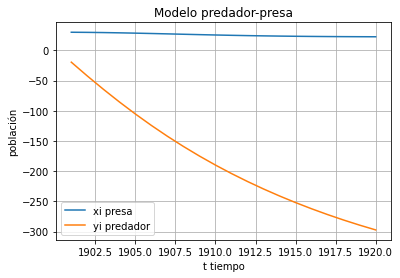

In [7]:
# Conejos y linces contra el tiempo
plt.plot(ti,xi, label='xi presa')
plt.plot(ti,yi, label='yi predador')

plt.title('Modelo predador-presa')
plt.xlabel('t tiempo')
plt.ylabel('población')
plt.legend()
plt.grid()
plt.show()

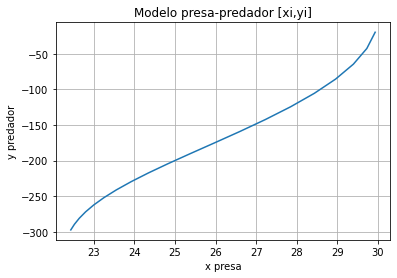

In [8]:
# gráfica conejos vs presas
plt.plot(xi,yi)

plt.title('Modelo presa-predador [xi,yi]')
plt.xlabel('x presa')
plt.ylabel('y predador')
plt.grid()
plt.show()